# Model Explainability
- https://www.analyticsvidhya.com/blog/2021/11/model-explainability/
- https://docs.aws.amazon.com/whitepapers/latest/model-explainability-aws-ai-ml/interpretability-versus-explainability.html

- refers to the concept of being able to explain and understand the machine learning model
- e.g., if a healthcare model is predicting whether a patient has a particular disease, the medical practitioners need to know what  parameters the model is takin into account to verify if the model contains any bias

## Why Model explainability?

- increase trust on the model
- detect if there is any bias present in the model
- important while debugging a model during the development phase
- critical for getting models to be vetted by regulatory authorities like FDA

## Interpretability vs explainability

- commonly interchangeble
- interpretability makes the model more transparent (glassbox and not blackbox)
- businesses can, e.g, understand exactly why and how the model is generating predications
    - observe the inner mechanics of the AI/ML models
    - model's weights and features to determine the given output
    
## Performance vs Interpretability

- as the performance improves, interpretability may normally decrease

![Performance vs Interpretability](https://docs.aws.amazon.com/images/whitepapers/latest/model-explainability-aws-ai-ml/images/interpretability-vs-performance-trade-off.png)

## Ways to interpret a model
- two ways Global vs Local

### Global Interpretation
- overall interpretation of all overall structure of input
- explain the complete behavior of the model
- explain the suitability of model for deployment
- E.g.: predicting the risk of disease in patients

### Local Interpretation

- understand how the model makes decision for a single instance
- explain the individual predictions
- understand the behavior of the model in the local neighborhood
- E.g., explain why a specific person has a high risk of a disease

### Methods for Local Intepretation

#### LIME - Local Interpretable Model-Agonistic Explanations
- helps understand how feature values impact on a single data sample
- since its a model agonistic technique, therefore it can be used on any model

#### Steps involved in LIME
- https://towardsdatascience.com/understanding-model-predictions-with-lime-a582fdff3a3b

1. creates a permutation (fake) of the given data
2.  calculates the distance between permutations and the original  observations (explictly spcify distance measured)
3. makes predictions on the new data using some black-box models
4. picks *m* features that describe the complex model (provide **m** we want to use)
5. uses the **m** features to fit a simple model in the permutated data with the similarity score as weights
6. weights from the simple model are used to proivde explanations for the complex model's local behavior

### Pima Indians Diabetes Database
- found here - https://github.com/priyankadalmia/medium/blob/main/diabetes.csv
- let's experiment with the dataset

In [1]:
import pandas as pd
import numpy as np
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
ds_url = 'https://raw.githubusercontent.com/priyankadalmia/Blog/main/diabetes.csv'
diabetes_df = pd.read_csv(ds_url)

In [4]:
diabetes_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
diabetes_df.shape

(768, 9)

In [6]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes_df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [8]:
feature_names = list(diabetes_df.columns)

In [9]:
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [10]:
feature_names.remove("Outcome")

In [11]:
# Split the dataset
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, \
y_train, y_test = train_test_split( diabetes_df[feature_names],
                                    diabetes_df.Outcome,
                                    test_size = 0.3,
                                    random_state = 100)

In [13]:
X_train.shape

(537, 8)

In [14]:
X_test.shape

(231, 8)

In [15]:
# Build a random forest model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier( n_estimators = 100,
                                 max_features = 0.2,
                                 max_depth = 10,
                                 max_samples = 0.5)

In [16]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=0.2, max_samples=0.5)

In [17]:
y_pred_prob = rf_clf.predict_proba( X_test )[:,1]
y_pred = rf_clf.predict( X_test )

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
y_test

173    0
253    0
207    1
737    0
191    0
      ..
259    1
512    0
111    1
548    0
680    0
Name: Outcome, Length: 231, dtype: int64

In [20]:
acc = accuracy_score(y_test, y_pred)

In [21]:
acc

0.7359307359307359

### LIME - Local Intrepretation of Model Explanation

#### Install Lime
```bash
conda install -c conda-forge lime
pip install lime
```

In [22]:
! pip install lime

Defaulting to user installation because normal site-packages is not writeable


In [23]:
import lime
import lime.lime_tabular

In [24]:
explainer = (lime
             .lime_tabular
             .LimeTabularExplainer(training_data = X_train.to_numpy(), 
                                   training_labels = y_train,                                   
                                   feature_names = feature_names, 
                                   class_names = ['Non-diabetes','Diabetes'],
                                   kernel_width=3,
                                   verbose = True ))

#### Explaining a case of Non-Diabetes

In [25]:
X_test.iloc[0]

Pregnancies                  1.000
Glucose                     79.000
BloodPressure               60.000
SkinThickness               42.000
Insulin                     48.000
BMI                         43.500
DiabetesPedigreeFunction     0.678
Age                         23.000
Name: 173, dtype: float64

In [26]:
y_test.iloc[0]

0

In [27]:
exp = explainer.explain_instance( X_test.iloc[0].to_numpy(), 
                                  rf_clf.predict_proba )

Intercept 0.39697944092471693
Prediction_local [0.33201417]
Right: 0.19300378787878789


In [28]:
# let's see some visual explanation
exp.show_in_notebook(show_table=True, show_all=False)

#### Explaining a case of Diabetes

In [29]:
exp = explainer.explain_instance( X_test.iloc[4].to_numpy(), 
                                  rf_clf.predict_proba )

Intercept 0.323484151718925
Prediction_local [0.53682702]
Right: 0.49332489725589906


In [30]:
exp.show_in_notebook(show_table=True, show_all=False)

## SHAP (SHapley Additive exPlanations)

- SHAP shows the impact of each feature by interpreting the impact of a certain value compared to a baseline value
- the baseline used for prediction is the average of all the predictions
- allows to determine any prediction as a sum of the effects of each feature value
- only drawback of SHAP is its higher computating time

### Install SHAP

```bash
pip install shap
```

In [35]:
! pip install shap

Defaulting to user installation because normal site-packages is not writeable


In [31]:
import shap

#### Explaining a case of Non-diabetes

In [32]:
row_to_show = 0
data_for_prediction = X_test.iloc[row_to_show]
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
rf_clf.predict_proba(data_for_prediction_array)

array([[0.80699621, 0.19300379]])

In [33]:
explainer = shap.TreeExplainer(rf_clf)

shap_values = explainer.shap_values(data_for_prediction_array)

In [34]:
shap.initjs()
shap.force_plot( explainer.expected_value[1], 
                 shap_values[1], 
                 data_for_prediction,
                 figsize=(20, 2) )

#### Explaining a case of Diabetes

In [36]:
row_to_show = 4
data_for_prediction = X_test.iloc[row_to_show]
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
rf_clf.predict_proba(data_for_prediction_array)

shap_values = explainer.shap_values(data_for_prediction_array)

shap.initjs()
shap.force_plot( explainer.expected_value[1], 
                 shap_values[1], 
                 data_for_prediction,
                 figsize=(20, 2) )

## Global Interpretation

- two common types of global interpretation techniques

## Partial Dependency Plots (PDPs)

- explains the global behavior of a model by showing the relationship of the marginal effect of each of the predictors on the response variable
- show the relationship between the target and a feature variable


#### Effect of insulin on Diabetes

In [37]:
from sklearn.inspection import PartialDependenceDisplay

import matplotlib.pyplot as plt

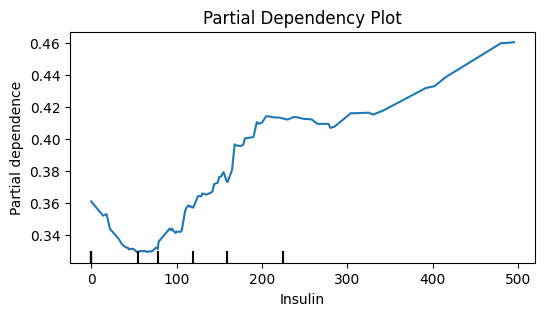

In [38]:

fig, ax = plt.subplots(figsize=(6, 3))
ax.set_title("Partial Dependency Plot")
PartialDependenceDisplay.from_estimator(rf_clf,
                                        X_test,
                                        features = ['Insulin'],
                                        feature_names = feature_names,
                                        ax = ax)

#### effect of Glucose on Diabetes


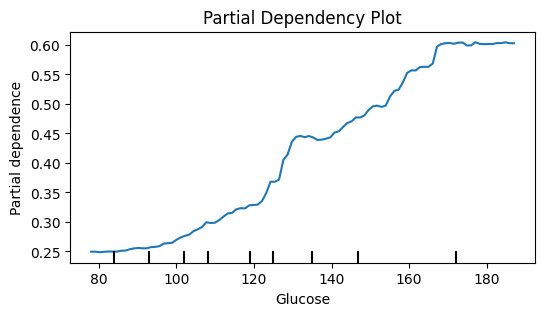

In [39]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.set_title("Partial Dependency Plot")
PartialDependenceDisplay.from_estimator(rf_clf,
                                        X_test,
                                        features = ['Glucose'],
                                        feature_names = feature_names,
                                        ax = ax)

### Individual Conditional Expectations (ICE)

- extension of PDP but more intuitive
- can explain heterogenous relationships
- ICE provides explanation of one feature at a time
- provides a plot of the average predicteed outcomes of a feature while keeping other feature values constant

#### effect of age on target variable

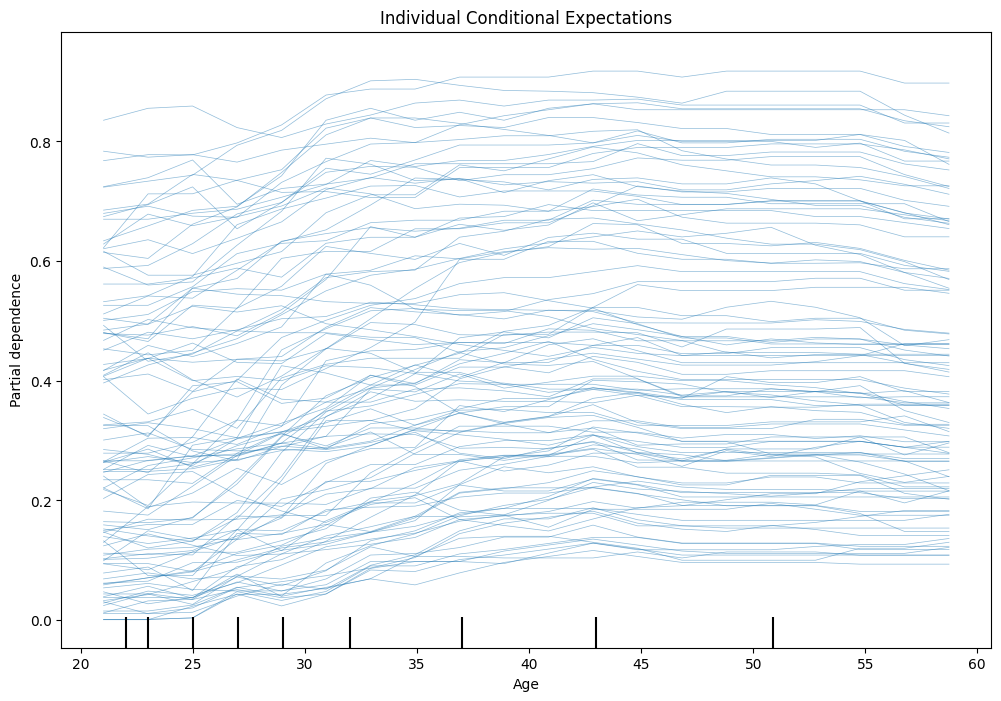

In [40]:
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Individual Conditional Expectations")

display = PartialDependenceDisplay.from_estimator(
    rf_clf,
    X_train,
    features=["Age"],
    kind="individual",
    subsample=100,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.5, "linewidth": 0.5},
    ax = ax
)

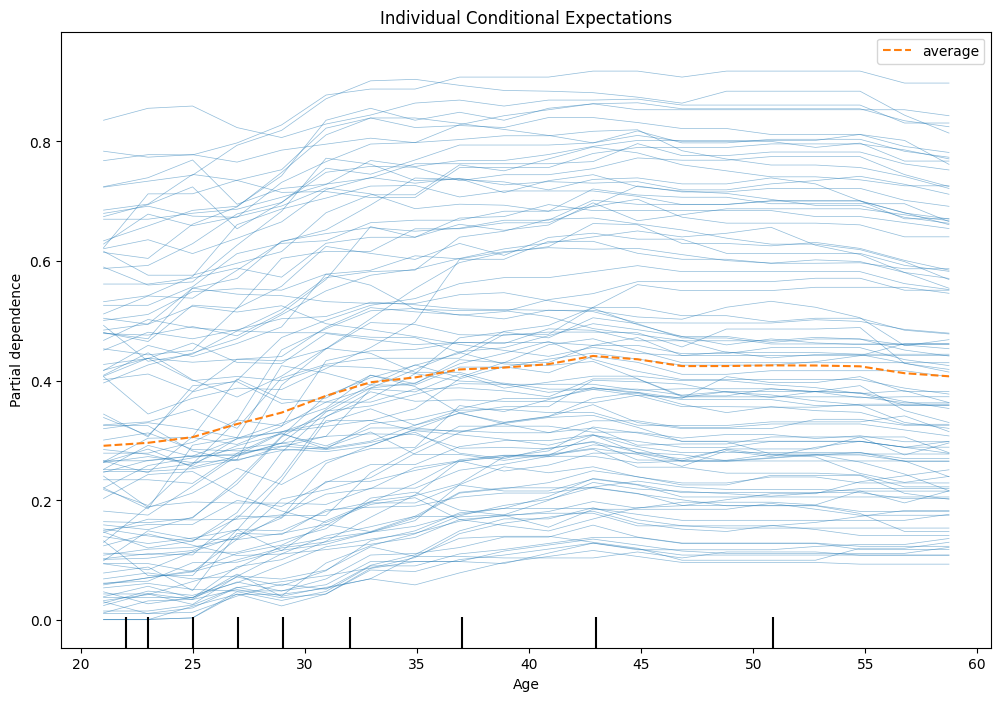

In [42]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Individual Conditional Expectations")

display = PartialDependenceDisplay.from_estimator(
    rf_clf,
    X_train,
    features=["Age"],
    kind="both",
    subsample=100,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.5, "linewidth": 0.5},
    pd_line_kw={"color": "tab:orange", "linestyle": "--"},
    ax = ax
)


## Understanding the model using ELI5

- ELI5 is a Python package which helps to debug machine learning classifiers and explain their predictions
- https://eli5.readthedocs.io/en/latest/overview.html

### Install ELI5 package

```bash
pip install eli5
#or
conda install -c conda-forge eli5
```

In [43]:
pip install eli5

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [44]:
tree_feature = pd.Series(rf_clf.feature_importances_, X_train.columns).sort_values(ascending = True)

Text(0.5, 1.0, 'Feature Importances')

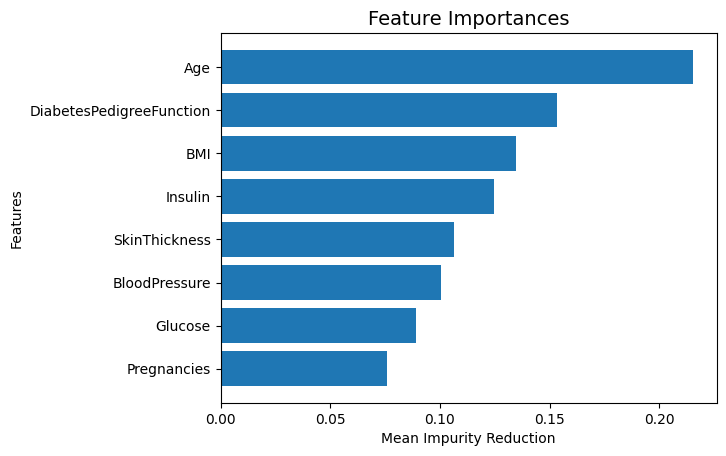

In [45]:
plt.barh(X_train.columns, tree_feature)
#plt.tick_params(labelrotation=45)
plt.xlabel('Mean Impurity Reduction', fontsize = 10)
plt.ylabel('Features', fontsize = 10)
plt.yticks(fontsize = 10, rotation=0)
plt.title('Feature Importances', fontsize = 14)

In [47]:
import eli5

ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (/usr/local/lib/python3.12/site-packages/sklearn/utils/metaestimators.py)

In [ ]:
eli5.explain_weights( 
    rf_clf, 
    feature_names = feature_names )

### Explain the weight of non-diabetes



In [60]:
X_test.iloc[5]

Pregnancies                   8.000
Glucose                     154.000
BloodPressure                78.000
SkinThickness                32.000
Insulin                       0.000
BMI                          32.400
DiabetesPedigreeFunction      0.443
Age                          45.000
Outcome                       1.000
Name: 754, dtype: float64

In [61]:
# sample label
y_test.iloc[5]

1

### Permutation importance

- shows how the scoring (accuracy, precision, recall, etc.) shifts with feature existance or no
- the higher the position, the more critical the features are affecting the scores
- `-ve` feature weights adversely affect the scores

In [49]:
from eli5 import show_weights, explain_weights
from eli5.sklearn import PermutationImportance

In [50]:
perm = PermutationImportance(rf_clf, scoring='accuracy', random_state=101).fit(X_train, y_train)
show_weights(perm, feature_names = list(X_test.columns))

## Global Explanation of SHAP


In [51]:
xplainer = shap.TreeExplainer( rf_clf )

In [52]:
shap_values = explainer.shap_values( X_train )

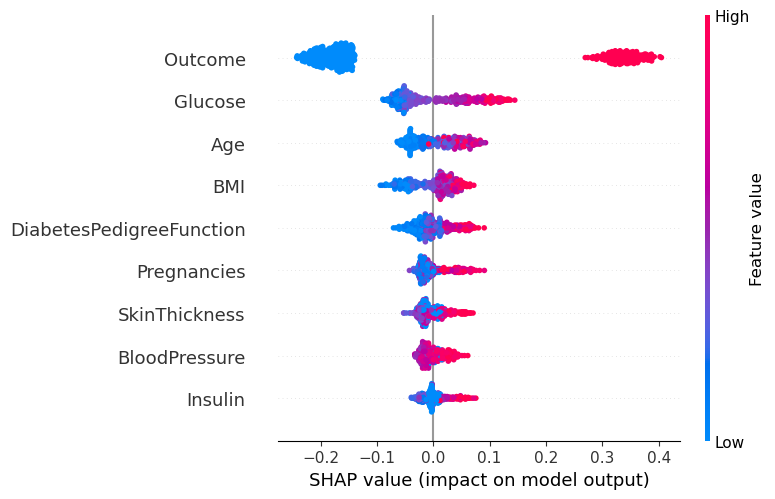

In [53]:
shap.summary_plot( shap_values[1], X_train, plot_type = 'dot' )

In [54]:
explainer.expected_value

array([0.65152985, 0.34847015])

In [55]:
shap.initjs()
shap.force_plot( explainer.expected_value[1], 
                 shap_values[1], 
                 X_train )

In [56]:
eli5.explain_prediction(rf_clf,
                    X_test.iloc[0],
                    target_names = ['Non-diabetes', 'Diabetes'] )

Explanation(estimator='RandomForestClassifier(max_depth=10, max_features=0.2, max_samples=0.5)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target='Non-diabetes', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.6515298507462687, std=None, value=1.0), FeatureWeight(feature='Outcome', weight=0.13738634499999144, std=None, value=0.0), FeatureWeight(feature='Glucose', weight=0.09155413691149737, std=None, value=79.0), FeatureWeight(feature='Age', weight=0.0572141382214533, std=None, value=23.0), FeatureWeight(feature='Insulin', weight=0.04517317551577243, std=None, value=48.0), FeatureWeight(feature='Pregnancies', weight=0.020574024017681488, std=None, value=1.0), FeatureWeight(feature='BloodPressure', weight=0.009413318758862017, std=None, value=60.0)], neg=[FeatureWeight(feature='SkinThickness', weight=-0.060103107592138334, std=None, value=42.0), FeatureWeight(feature='DiabetesPedigreeFunction', weight=-0.0289902110241937, std=None, value=0.678), FeatureWeight(feature='BMI', weight=-0.026660761464285566, std=None, value=43.5)], pos_remaining=0, neg_remaining=0), proba=0.897090909090909, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [62]:
# let's predict 6th sample
eli5.explain_prediction(rf_clf,
                    X_test.iloc[5],
                    target_names = ['Non-diabetes', 'Diabetes'] )

Explanation(estimator='RandomForestClassifier(max_depth=10, max_features=0.2, max_samples=0.5)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target='Diabetes', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.3484701492537313, std=None, value=1.0), FeatureWeight(feature='Outcome', weight=0.3061227595921449, std=None, value=1.0), FeatureWeight(feature='Glucose', weight=0.08317807770594922, std=None, value=154.0), FeatureWeight(feature='Pregnancies', weight=0.07592173081482848, std=None, value=8.0), FeatureWeight(feature='Age', weight=0.060534405601419115, std=None, value=45.0), FeatureWeight(feature='BMI', weight=0.001739850787423747, std=None, value=32.4)], neg=[FeatureWeight(feature='BloodPressure', weight=-0.0049494537118721085, std=None, value=78.0), FeatureWeight(feature='SkinThickness', weight=-0.003656735061291361, std=None, value=32.0), FeatureWeight(feature='DiabetesPedigreeFunction', weight=-0.0033689874181709258, std=None, value=0.443), FeatureWeight(feature='Insulin', weight=-0.0020711626435276033, std=None, value=0.0)], pos_remaining=0, neg_remaining=0), proba=0.861920634920635, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)